In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
page_view = pd.read_csv("C:/Users/anupr/Documents/R programming/page_views.csv")

In [3]:
page_view.head()

,user_id,homepage,pymt,pymt_confirmation,search_page
0,144912,1,0,0,0
1,60659,1,0,0,0
2,140860,1,0,0,1
3,206992,1,0,0,1
4,320259,1,0,0,0


In [4]:
   page_view.isnull().sum(axis = 0)

user_id              0
homepage             0
pymt                 0
pymt_confirmation    0
search_page          0
dtype: int64

In [5]:
#row count
page_view.shape[0]

202653

In [6]:
users = pd.read_csv("C:/Users/anupr/Documents/R programming/users.csv")

In [7]:
users.head()

,user_id,date,sex,device,origin,Unnamed: 5
0,0,4/19/2015,Female,Desktop,paid_search,NaN
1,1,3/9/2015,Female,Desktop,paid_search,NaN
2,1,3/23/2015,Male,Mobile,paid_search,NaN
3,4,4/25/2015,Male,Mobile,email,NaN
4,4,1/6/2015,Female,Desktop,organic_search,NaN


In [8]:
#Column count
len(users.columns)

6

In [9]:
## Column headers
list(users)

['user_id', 'date', 'sex', 'device', 'origin', 'Unnamed: 5']

In [10]:
users.drop('Unnamed: 5', axis=1).head()

,user_id,date,sex,device,origin
0,0,4/19/2015,Female,Desktop,paid_search
1,1,3/9/2015,Female,Desktop,paid_search
2,1,3/23/2015,Male,Mobile,paid_search
3,4,4/25/2015,Male,Mobile,email
4,4,1/6/2015,Female,Desktop,organic_search


In [11]:
unique_page_view = page_view.groupby(['user_id']).sum()
unique_page_view.shape[0]


138191

In [12]:
unique_page_view.sort_values(by=['pymt_confirmation'], ascending=False).head()

,homepage,pymt,pymt_confirmation,search_page
user_id,,,,
63793,2,2,2,2
25390,3,2,2,3
25629,2,2,2,2
63777,2,2,2,2
300147,2,2,2,2


In [13]:
unique_page_view.sum()

homepage             202653
pymt                  13459
pymt_confirmation       990
search_page          101105
dtype: int64

In [14]:
view_sum = pd.DataFrame(unique_page_view.sum())
view_sum.head()


,0
homepage,202653
pymt,13459
pymt_confirmation,990
search_page,101105


In [15]:
view_sum.shape[1]


1

In [16]:
view_sum.columns = ['Views']
view_sum['Pages'] = view_sum.index
view_sum

,Views,Pages
homepage,202653,homepage
pymt,13459,pymt
pymt_confirmation,990,pymt_confirmation
search_page,101105,search_page


In [17]:
view_sum.dtypes

Views     int64
Pages    object
dtype: object

In [18]:
import seaborn as sns


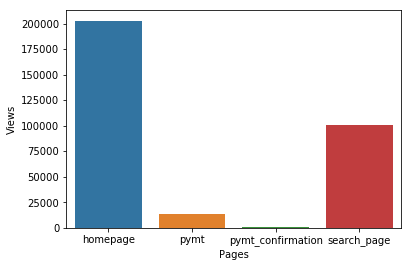

In [19]:
sns.barplot(x='Pages', y='Views', data=view_sum)

In [20]:
user_page_join = unique_page_view.join(users).drop('Unnamed: 5', axis=1)
user_page_join.head()

,homepage,pymt,pymt_confirmation,search_page,user_id,date,sex,device,origin
user_id,,,,,,,,,
0,1,0,0,0,0.0,4/19/2015,Female,Desktop,paid_search
1,2,0,0,1,1.0,3/9/2015,Female,Desktop,paid_search
4,2,0,0,1,4.0,1/6/2015,Female,Desktop,organic_search
6,1,0,0,0,7.0,2/25/2015,Male,Desktop,other
7,2,0,0,0,7.0,3/19/2015,Female,Desktop,paid_search


In [21]:
# Total number of rows
user_page_join.shape[0]

138191

In [22]:
list(user_page_join)

['homepage',
 'pymt',
 'pymt_confirmation',
 'search_page',
 'user_id',
 'date',
 'sex',
 'device',
 'origin']

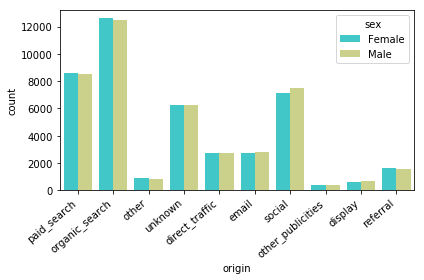

In [40]:
ax = sns.countplot(x='origin',hue = 'sex',data = user_page_join, palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


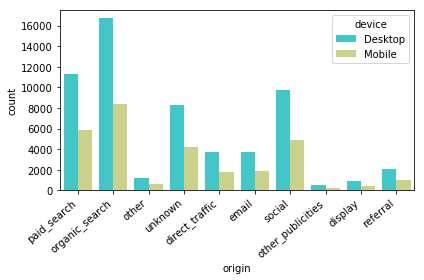

In [41]:
ax=sns.countplot(x='origin',hue = 'device',data = user_page_join, palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


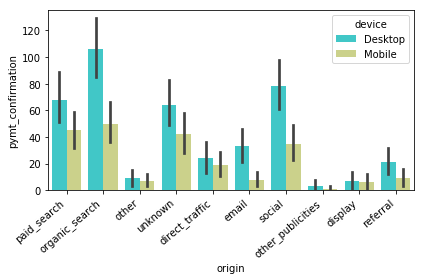

In [50]:
ax=sns.barplot(x='origin',y='pymt_confirmation',hue = 'device',data = user_page_join, palette='rainbow', estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

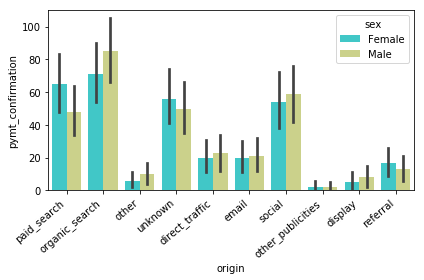

In [48]:
ax=sns.barplot(x='origin',y='pymt_confirmation',hue = 'sex',data = user_page_join, estimator=sum, palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

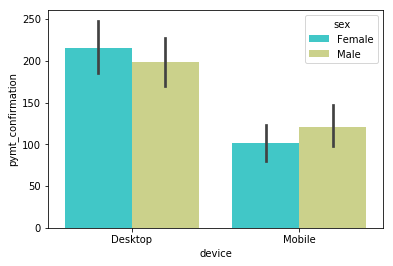

In [60]:
sns.barplot(x="device", y="pymt_confirmation",hue = 'sex', data=user_page_join,palette='rainbow',estimator=sum)